In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import glob
import pickle

In [98]:
subject_id = "PRX900"

SPAR_feature_subject_files = glob.glob("/content/drive/Shareddrives/PhD/Data/SMILE/SPAR_results/features/"+subject_id+"/*")

dfs = []

for file in SPAR_feature_subject_files:
    with open(file, "rb") as f:
        data_dict = pickle.load(f)

    df = pd.DataFrame(data_dict)

    df["PHE_0"] = df["Persistent Homology Entropy"].apply(lambda x: x[0])
    df["PHE_1"] = df["Persistent Homology Entropy"].apply(lambda x: x[1])

    # Drop the original column with the array
    df = df.drop(columns=["Persistent Homology Entropy"])

    dfs.append(df)

    #break

combined_subject_df = pd.concat(dfs, ignore_index=True)

In [79]:
combined_subject_df.columns

Index(['Box Counting Dimension', 'Attractor Volume', 'Mean Distance',
       'Std Distance', 'Skewness Distance', 'Kurtosis Distance',
       'PCA Variance Explained', 'Recurrence Rate', 'Determinism',
       'Trapping Time', 'Shannon Entropy', 'Betti0', 'Betti1', 'activity_mode',
       'start_timestamp', 'end_timestamp', 'PHE_0', 'PHE_1'],
      dtype='object')

In [80]:
combined_subject_df.to_csv("/content/drive/Shareddrives/PhD/Data/SMILE/SPAR_results/"+subject_id+".csv", index=False)

In [99]:
# convert them to int first
combined_subject_df['start_timestamp'] = combined_subject_df['start_timestamp'].astype(int)#
combined_subject_df['end_timestamp'] = combined_subject_df['end_timestamp'].astype(int)
combined_subject_df['start_timestamp'] = pd.to_datetime(combined_subject_df['start_timestamp'], unit='ms')
combined_subject_df['end_timestamp'] = pd.to_datetime(combined_subject_df['end_timestamp'], unit='ms')

<ipython-input-102-b4b9fca93772>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['start_timestamp'] = pd.to_datetime(plot_df['start_timestamp'])
<ipython-input-102-b4b9fca93772>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(activity_modes.unique()))  # Use 'tab10' for categorical colors


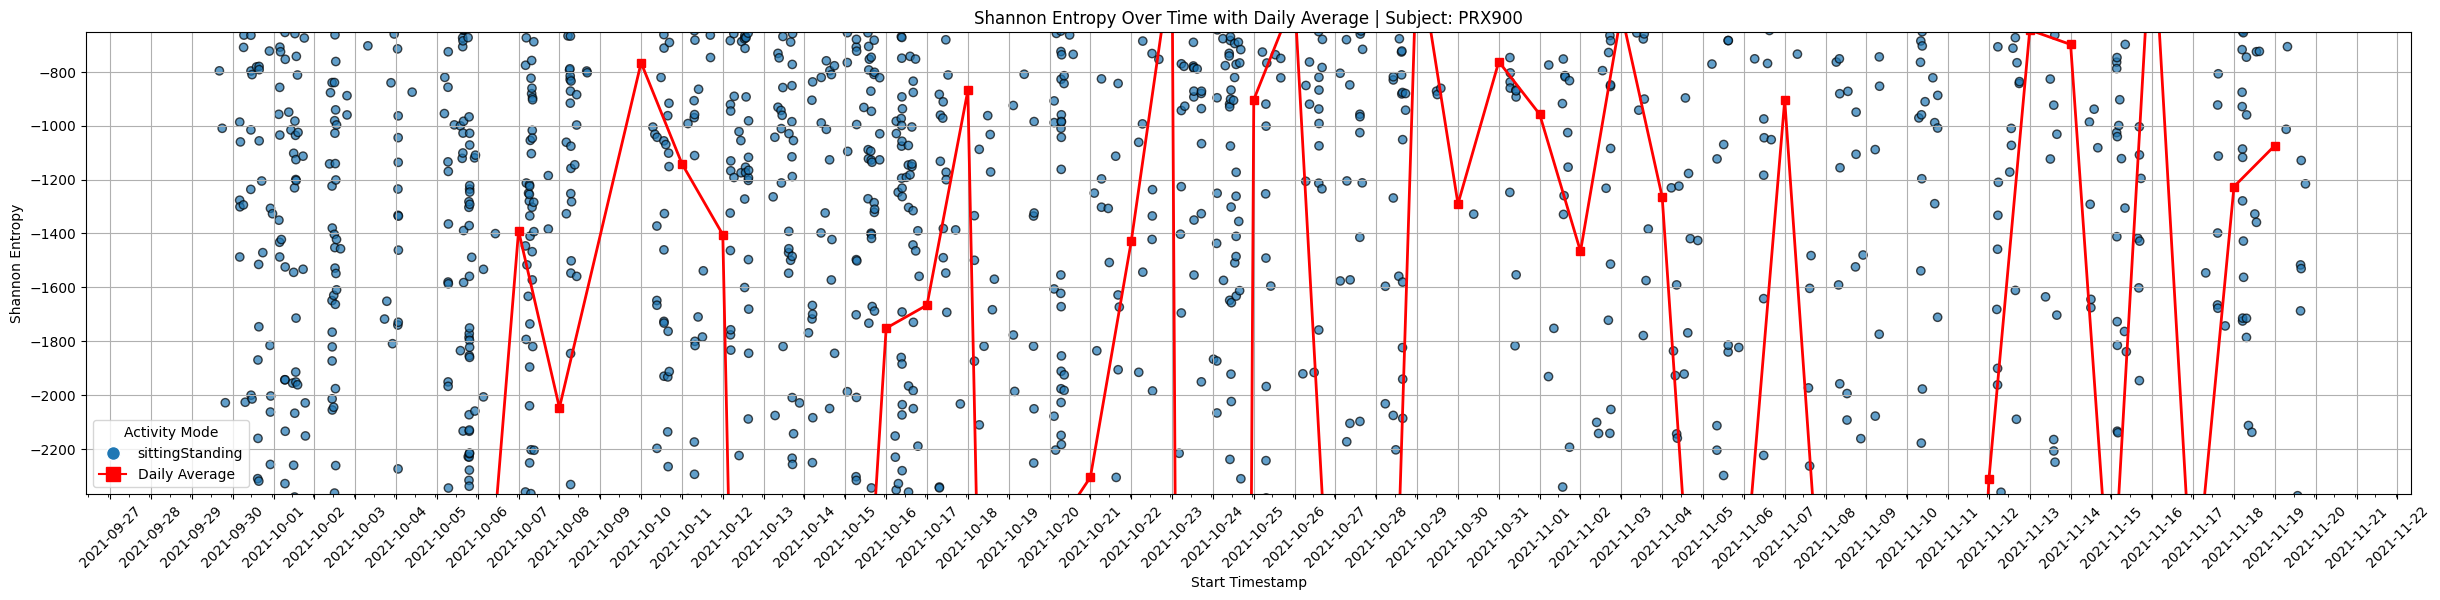

In [102]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plot_df = combined_subject_df
#plot_df = combined_subject_df[combined_subject_df['activity_mode'].isin(['lyingBack', 'lyingLeft', 'lyingRight'])]
plot_df = combined_subject_df[combined_subject_df['activity_mode'].isin(['sittingStanding'])]

column = 'Shannon Entropy'

# Ensure start_timestamp is in datetime format
plot_df['start_timestamp'] = pd.to_datetime(plot_df['start_timestamp'])

# Sort data by timestamp
plot_df = plot_df.sort_values(by='start_timestamp')

# Encode activity_mode as a categorical variable
activity_modes = plot_df['activity_mode'].astype('category')
activity_labels = activity_modes.cat.codes  # Convert categories to numbers

# Calculate daily average
daily_avg = plot_df.groupby(plot_df['start_timestamp'].dt.date)[column].mean()

# Convert index to datetime format
daily_avg.index = pd.to_datetime(daily_avg.index)

# Define colormap
cmap = plt.cm.get_cmap('tab10', len(activity_modes.unique()))  # Use 'tab10' for categorical colors

# Plot
fig, ax = plt.subplots(figsize=(30, 6))

# Scatter plot with color mapping based on activity_mode
sc = ax.scatter(plot_df['start_timestamp'], plot_df[column],
                c=activity_labels, cmap=cmap, label="Activity Mode", edgecolors='black', alpha=0.7)

# Plot daily average line
ax.plot(daily_avg.index, daily_avg, marker='s', linestyle='-', color='red', linewidth=2, label="Daily Average")

# Format x-axis to show more dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Show every 12 hours as minor ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD

# Labels and title
plt.xlabel('Start Timestamp')
plt.ylabel(column)
plt.title(f'{column} Over Time with Daily Average | Subject: {subject_id}')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Create legend for activity_mode
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10, label=mode)
           for i, mode in enumerate(activity_modes.cat.categories)]
ax.legend(handles=handles + [plt.Line2D([0], [0], marker='s', color='red', markersize=10, label="Daily Average")],
          title="Activity Mode")


ax.set_ylim(combined_subject_df[column].quantile(0.5), combined_subject_df[column].quantile(0.7))


plt.grid(True)

# Show plot
plt.show()

In [94]:
print(combined_subject_df[column].describe())

count    3.045500e+04
mean    -1.121290e+06
std      3.096590e+06
min     -2.454343e+07
25%     -2.432897e+04
50%     -2.366571e+03
75%     -4.494851e+02
max      4.101991e+01
Name: Shannon Entropy, dtype: float64


In [ ]:
spar_feature_df = pd.read_csv("/content/drive/Shareddrives/PhD/Data/SMILE/SPAR_results/PRX900.csv")
resp_feature_df = pd.read_csv("/content/drive/Shareddrives/PhD/BreathFeatures/breathFeaturesStats/PRX900.csv")

In [ ]:
spar_feature_df["start_timestamp"] = pd.to_datetime(spar_feature_df["start_timestamp"].astype("int64"), unit="ms")
spar_feature_df["end_timestamp"] = pd.to_datetime(spar_feature_df["end_timestamp"].astype("int64"), unit="ms")

In [ ]:
resp_feature_df['start_timestamp'] = pd.to_datetime(resp_feature_df['start_timestamp'])
resp_feature_df['end_timestamp'] = pd.to_datetime(resp_feature_df['end_timestamp'])

In [ ]:
df_merged = pd.merge(spar_feature_df, resp_feature_df, on="start_timestamp", how="inner")

In [ ]:
df_merged = df_merged[df_merged['activity_mode'] == 'sittingStanding']

In [ ]:
df_merged = df_merged.drop(columns=["start_timestamp", "activity_mode", "end_timestamp_x", "end_timestamp_y", "Betti0", "Betti1"])

In [ ]:
df_merged = df_merged.loc[:, df_merged.std() != 0]

In [ ]:
# Define two sets of columns
set1 = df_merged.columns[:13]
set2 = df_merged.columns[13:]

In [ ]:
# Compute full correlation matrix
full_corr_matrix = df_merged.corr()

# Extract correlations between set1 and set2
correlation_matrix = full_corr_matrix.loc[set1, set2]

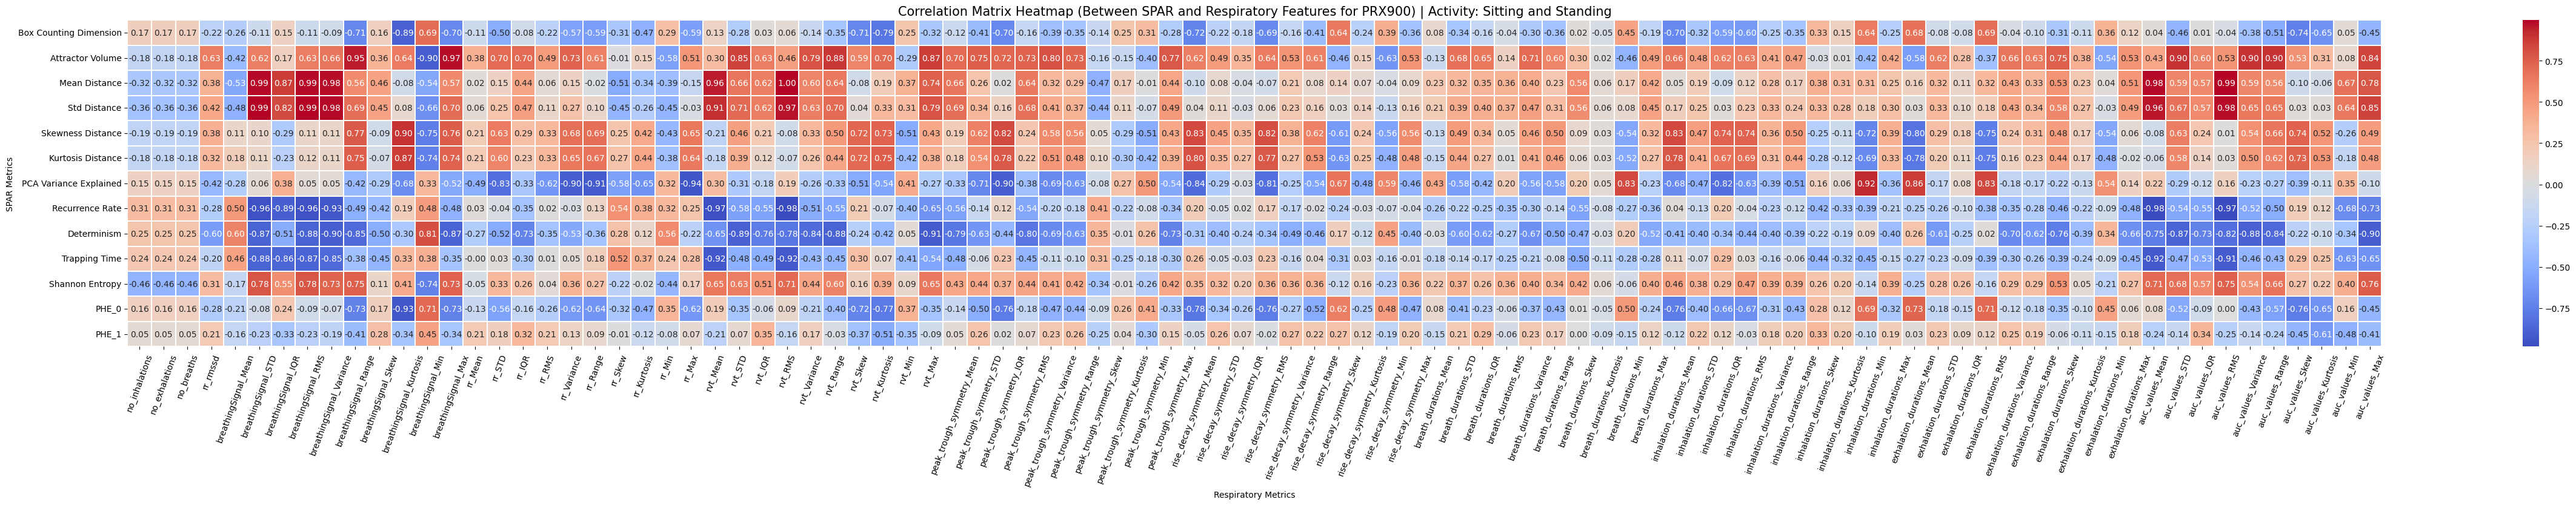

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(60, 7))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)

# Title and labels
plt.title("Correlation Matrix Heatmap (Between SPAR and Respiratory Features for PRX900) | Activity: Sitting and Standing", fontsize=15)
plt.xlabel("Respiratory Metrics")
plt.ylabel("SPAR Metrics")

# Rotate x-axis labels
plt.xticks(rotation=70)  # Adjust rotation angle as needed

# Show plot
plt.show()
